In [1]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import category_encoders as ce


In [2]:
# Load data from csv
house_data = pd.read_csv("train (1).csv")
house_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Check all columns 
house_data.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [4]:
#get shape of dataframe
house_data.shape


(1460, 81)

In [5]:
#get model description of dataframe
house_data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#cheked any null column exist or not
nuni = house_data.nunique()
nuni[nuni==0]


Series([], dtype: int64)

In [8]:
#Drop columns with maximum missing values
house_data = house_data.drop(columns=['PoolQC','Fence', 'MiscFeature'])


In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
house_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
#check unique values of FireplaceQu 
house_data.FireplaceQu.value_counts()


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [12]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

In [13]:
#Drop Alley column because more than 90% values are missing or No Alley
house_data=house_data.drop(columns=['Alley'])


In [14]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')


In [15]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]


LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [16]:
#check unique values of LotFrontage
house_data.LotFrontage.value_counts()


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [17]:
#check median of LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median



69.0

In [18]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)


In [19]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median()) 



In [20]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('None')


In [21]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')


In [22]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')


In [23]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')


In [24]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')


In [25]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')


In [26]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0]) 


In [27]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')


In [28]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)


In [29]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')


In [30]:
#replace Nan values of GarageQual with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')


In [31]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')


In [32]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')


In [33]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]


Series([], dtype: int64)

In [34]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt


In [35]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])


In [36]:

#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)


In [37]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})


In [38]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})


In [39]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})


In [40]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})


In [41]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})


In [42]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})


In [43]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})


In [44]:
house_data.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [45]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [46]:
for c in house_data.columns:
    if house_data[c].dtype == np.object :
        print(c)
        print(house_data[c].value_counts(normalize=True))


MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [47]:
#Drop columns which have moe than 80% bias data
house_data=house_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])


In [48]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [49]:
#Get all object type columns
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)


['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


# Create Dummy Varibales

In [50]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [51]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [52]:
#concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [53]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')


In [54]:
#concat LotShape_df with main house_data df
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [55]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')


In [56]:
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [57]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [58]:
#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)


In [59]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [60]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [61]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [62]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0

In [63]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.

In [64]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8

In [65]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
house_data = pd.concat([house_data,GarageType_df],axis=1)
house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [66]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [67]:
house_data.shape


(1460, 162)

In [68]:
#Drop categorical variables after ceating dummy varaibles
house_data=house_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])


In [69]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(39), uint8(107)
memory usage: 631.7 KB


# Prepairing Data For Modeling

In [70]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)


(1021, 149)
(439, 149)


In [71]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,102

# Rescalling The Numeric Factors

In [72]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.175567,-1.257424,-0.154845,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,0.741868,-0.937484,-0.927153,-0.985354,0.179549,-1.034916,-1.023035,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.10

In [73]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,

# Training The Model

In [74]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train


X_train.columns


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

# RFE- Recursive Feature Elimination

In [79]:
# Running RFE with the number of selected features equal to 35
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=35)
rfe = rfe.fit(X_train, y_train)

# Displaying a list of tuples containing column names, support status, and ranking
feature_ranks = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
print(feature_ranks)

# Extracting the selected columns from RFE
selected_columns = X_train.columns[rfe.support_]
print("Selected Columns:", selected_columns)

# Extracting the skipped columns from RFE
skipped_columns = X_train.columns[~rfe.support_]
print("Skipped Columns:", skipped_columns)




[('LotFrontage', False, 48), ('LotArea', False, 43), ('OverallQual', True, 1), ('OverallCond', False, 7), ('YearRemodAdd', False, 95), ('MasVnrArea', False, 84), ('ExterQual', False, 56), ('BsmtQual', False, 3), ('BsmtExposure', True, 1), ('BsmtFinType1', False, 63), ('BsmtFinSF1', False, 14), ('BsmtFinSF2', False, 19), ('BsmtUnfSF', False, 18), ('TotalBsmtSF', False, 20), ('HeatingQC', False, 104), ('1stFlrSF', True, 1), ('2ndFlrSF', True, 1), ('LowQualFinSF', False, 17), ('GrLivArea', False, 16), ('BsmtFullBath', False, 11), ('BsmtHalfBath', False, 93), ('FullBath', False, 88), ('HalfBath', False, 75), ('BedroomAbvGr', False, 77), ('KitchenAbvGr', False, 31), ('KitchenQual', True, 1), ('TotRmsAbvGrd', False, 73), ('Fireplaces', False, 85), ('FireplaceQu', False, 97), ('GarageYrBlt', False, 109), ('GarageCars', True, 1), ('GarageArea', False, 87), ('WoodDeckSF', False, 91), ('OpenPorchSF', False, 108), ('EnclosedPorch', False, 102), ('3SsnPorch', False, 61), ('ScreenPorch', False, 86)

# Building model using statsmodel, for the detailed statistics

In [82]:
# Running RFE with the number of selected features equal to 35
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=35)
rfe = rfe.fit(X_train, y_train)

# Extracting the selected columns from RFE
col = X_train.columns[rfe.support_]

# Creating X_train with RFE selected columns
X_train_rfe = X_train[col]



In [83]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)


In [84]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model


In [85]:
#Get the Summary of Linear Model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     136.5
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:21:08   Log-Likelihood:                -12074.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     986   BIC:                         2.439e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.931      0.000    1.32e+05    1.75e+05
OverallQual           2.002e+04   1893.534     10.571      0.000    1.63e+04    2.37e+04
BsmtExposure          1.087e+04   1229.363      8.839      0.000    8453.342    1.33e+04
1stFlrSF              2.325e+04   1535.816     15.141      0.000    2.02e+04    2.63e+04
2ndFlrSF              1.895e+04   1427.915     13.269      0.000    1.61e+04    2.17e+04
KitchenQual           1.013e+04   1512.979      6.694      0.000    7159.290    1.31e+04
GarageCars            9541.0521   1710.893      5.577      0.000    6183.642    1.29e+04
MSSubClass_45        -2.258e+04   2.64e+04     -0.856      0.392   -7.44e+04    2.92e+04
MSSubClass_180       -8637.3774   1.54e+04     -0.559      0.576   -3.89e+04    2.17e+04
MSSubClass_190       -1.282e+04   7221.412     -1.775      0.076    -2.7e+04    1352.028
MSZoning_RM           -1.61e+04   3440.848     -4.679      0.000   -2.29e+04   -9345.957
LotShape_IR3         -1.694e+04   1.15e+04     -1.468      0.143   -3.96e+04    5712.282
LotConfig_FR3        -1.931e+04   1.97e+04     -0.981      0.327    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9656.0110   7891.674      1.224      0.221   -5830.396    2.51e+04
Neighborhood_Edwards -1.404e+04   4341.035     -3.235      0.001   -2.26e+04   -5523.950
Neighborhood_NPkVill -1.029e+04   1.39e+04     -0.739      0.460   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.209e+04   6574.791      9.443      0.000    4.92e+04     7.5e+04
Neighborhood_NridgHt  4.435e+04   5411.133      8.196      0.000    3.37e+04     5.5e+04
Neighborhood_Somerst  1.702e+04   5026.126      3.386      0.001    7154.705    2.69e+04
Neighborhood_StoneBr  2.205e+04   9827.518      2.244      0.025    2765.883    4.13e+04
HouseStyle_1.5Unf     1.617e+04   2.43e+04      0.667      0.505   -3.14e+04    6.38e+04
RoofStyle_Gambrel     1.896e+04   1.97e+04      0.963      0.336   -1.97e+04    5.76e+04
Exterior1st_AsphShn   -3.61e+04   3.42e+04     -1.054      0.292   -1.03e+05    3.11e+04
Exterior1st_BrkFace    1.65e+04   6436.112      2.563      0.011    3865.068    2.91e+04
Exterior1st_CemntBd  -2.252e+04   2.45e+04     -0.920      0.358   -7.05e+04    2.55e+04
Exterior1st_ImStucc  -3.033e+04   3.44e+04     -0.882      0.378   -9.78e+04    3.72e+04
Exterior1st_Stone     -1.33e+04   2.43e+04     -0.548      0.584   -6.09e+04    3.43e+04
Exterior1st_Stucco   -1.709e+04   7945.677     -2.150      0.032   -3.27e+04   -1493.782
Exterior2nd_CmentBd   3.064e+04   2.45e+04      1.249      0.212   -1.75e+04    7.88e+04
GarageType_Attchd     2.979e+04   1.11e+04      2.683      0.007    8002.423    5.16e+04
GarageType_Basment    1.228e+04   1.49e+04      0.825      0.410   -1.69e+04    4.15e+04
GarageType_BuiltIn    2.661e+04    1.2e+04      2.219    

In [86]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif


,Features,VIF
34,GarageFinish_NA,inf
33,GarageType_NA,inf
0,const,109.09
29,GarageType_Attchd,26.85
32,GarageType_Detchd,21.88
28,Exterior2nd_CmentBd,18.94
24,Exterior1st_CemntBd,18.83
31,GarageType_BuiltIn,7.72
7,MSSubClass_45,6.68
20,HouseStyle_1.5Unf,6.66


In [87]:
X_train_new = X_train_rfe.drop(['GarageType_NA'],axis=1)


X_train_new.columns


X_train_lm = sm.add_constant(X_train_new)


In [88]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()


In [89]:
#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     136.5
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:22:36   Log-Likelihood:                -12074.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     986   BIC:                         2.439e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.931      0.000    1.32e+05    1.75e+05
OverallQual           2.002e+04   1893.534     10.571      0.000    1.63e+04    2.37e+04
BsmtExposure          1.087e+04   1229.363      8.839      0.000    8453.342    1.33e+04
1stFlrSF              2.325e+04   1535.816     15.141      0.000    2.02e+04    2.63e+04
2ndFlrSF              1.895e+04   1427.915     13.269      0.000    1.61e+04    2.17e+04
KitchenQual           1.013e+04   1512.979      6.694      0.000    7159.290    1.31e+04
GarageCars            9541.0521   1710.893      5.577      0.000    6183.642    1.29e+04
MSSubClass_45        -2.258e+04   2.64e+04     -0.856      0.392   -7.44e+04    2.92e+04
MSSubClass_180       -8637.3774   1.54e+04     -0.559      0.576   -3.89e+04    2.17e+04
MSSubClass_190       -1.282e+04   7221.412     -1.775      0.076    -2.7e+04    1352.028
MSZoning_RM           -1.61e+04   3440.848     -4.679      0.000   -2.29e+04   -9345.957
LotShape_IR3         -1.694e+04   1.15e+04     -1.468      0.143   -3.96e+04    5712.282
LotConfig_FR3        -1.931e+04   1.97e+04     -0.981      0.327    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9656.0110   7891.674      1.224      0.221   -5830.396    2.51e+04
Neighborhood_Edwards -1.404e+04   4341.035     -3.235      0.001   -2.26e+04   -5523.950
Neighborhood_NPkVill -1.029e+04   1.39e+04     -0.739      0.460   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.209e+04   6574.791      9.443      0.000    4.92e+04     7.5e+04
Neighborhood_NridgHt  4.435e+04   5411.133      8.196      0.000    3.37e+04     5.5e+04
Neighborhood_Somerst  1.702e+04   5026.126      3.386      0.001    7154.705    2.69e+04
Neighborhood_StoneBr  2.205e+04   9827.518      2.244      0.025    2765.883    4.13e+04
HouseStyle_1.5Unf     1.617e+04   2.43e+04      0.667      0.505   -3.14e+04    6.38e+04
RoofStyle_Gambrel     1.896e+04   1.97e+04      0.963      0.336   -1.97e+04    5.76e+04
Exterior1st_AsphShn   -3.61e+04   3.42e+04     -1.054      0.292   -1.03e+05    3.11e+04
Exterior1st_BrkFace    1.65e+04   6436.112      2.563      0.011    3865.068    2.91e+04
Exterior1st_CemntBd  -2.252e+04   2.45e+04     -0.920      0.358   -7.05e+04    2.55e+04
Exterior1st_ImStucc  -3.033e+04   3.44e+04     -0.882      0.378   -9.78e+04    3.72e+04
Exterior1st_Stone     -1.33e+04   2.43e+04     -0.548      0.584   -6.09e+04    3.43e+04
Exterior1st_Stucco   -1.709e+04   7945.677     -2.150      0.032   -3.27e+04   -1493.782
Exterior2nd_CmentBd   3.064e+04   2.45e+04      1.249      0.212   -1.75e+04    7.88e+04
GarageType_Attchd     2.979e+04   1.11e+04      2.683      0.007    8002.423    5.16e+04
GarageType_Basment    1.228e+04   1.49e+04      0.825      0.410   -1.69e+04    4.15e+04
GarageType_BuiltIn    2.661e+04    1.2e+04      2.219    

In [93]:
# Check if the column exists in X_train_new before dropping
if 'Exterior1st_CBlock' in X_train_new.columns:
    X_train_new = X_train_new.drop(['Exterior1st_CBlock'], axis=1)
else:
    print("Column 'Exterior1st_CBlock' not found in X_train_new")

# Add a constant to X_train_new
X_train_lm = sm.add_constant(X_train_new)

print(X_train_new.columns)

Column 'Exterior1st_CBlock' not found in X_train_new
Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_NA', 'GarageFinish_RFn'], dtype='object')


In [94]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()


In [95]:
#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     136.5
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:24:51   Log-Likelihood:                -12074.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     986   BIC:                         2.439e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.931      0.000    1.32e+05    1.75e+05
OverallQual           2.002e+04   1893.534     10.571      0.000    1.63e+04    2.37e+04
BsmtExposure          1.087e+04   1229.363      8.839      0.000    8453.342    1.33e+04
1stFlrSF              2.325e+04   1535.816     15.141      0.000    2.02e+04    2.63e+04
2ndFlrSF              1.895e+04   1427.915     13.269      0.000    1.61e+04    2.17e+04
KitchenQual           1.013e+04   1512.979      6.694      0.000    7159.290    1.31e+04
GarageCars            9541.0521   1710.893      5.577      0.000    6183.642    1.29e+04
MSSubClass_45        -2.258e+04   2.64e+04     -0.856      0.392   -7.44e+04    2.92e+04
MSSubClass_180       -8637.3774   1.54e+04     -0.559      0.576   -3.89e+04    2.17e+04
MSSubClass_190       -1.282e+04   7221.412     -1.775      0.076    -2.7e+04    1352.028
MSZoning_RM           -1.61e+04   3440.848     -4.679      0.000   -2.29e+04   -9345.957
LotShape_IR3         -1.694e+04   1.15e+04     -1.468      0.143   -3.96e+04    5712.282
LotConfig_FR3        -1.931e+04   1.97e+04     -0.981      0.327    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9656.0110   7891.674      1.224      0.221   -5830.396    2.51e+04
Neighborhood_Edwards -1.404e+04   4341.035     -3.235      0.001   -2.26e+04   -5523.950
Neighborhood_NPkVill -1.029e+04   1.39e+04     -0.739      0.460   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.209e+04   6574.791      9.443      0.000    4.92e+04     7.5e+04
Neighborhood_NridgHt  4.435e+04   5411.133      8.196      0.000    3.37e+04     5.5e+04
Neighborhood_Somerst  1.702e+04   5026.126      3.386      0.001    7154.705    2.69e+04
Neighborhood_StoneBr  2.205e+04   9827.518      2.244      0.025    2765.883    4.13e+04
HouseStyle_1.5Unf     1.617e+04   2.43e+04      0.667      0.505   -3.14e+04    6.38e+04
RoofStyle_Gambrel     1.896e+04   1.97e+04      0.963      0.336   -1.97e+04    5.76e+04
Exterior1st_AsphShn   -3.61e+04   3.42e+04     -1.054      0.292   -1.03e+05    3.11e+04
Exterior1st_BrkFace    1.65e+04   6436.112      2.563      0.011    3865.068    2.91e+04
Exterior1st_CemntBd  -2.252e+04   2.45e+04     -0.920      0.358   -7.05e+04    2.55e+04
Exterior1st_ImStucc  -3.033e+04   3.44e+04     -0.882      0.378   -9.78e+04    3.72e+04
Exterior1st_Stone     -1.33e+04   2.43e+04     -0.548      0.584   -6.09e+04    3.43e+04
Exterior1st_Stucco   -1.709e+04   7945.677     -2.150      0.032   -3.27e+04   -1493.782
Exterior2nd_CmentBd   3.064e+04   2.45e+04      1.249      0.212   -1.75e+04    7.88e+04
GarageType_Attchd     2.979e+04   1.11e+04      2.683      0.007    8002.423    5.16e+04
GarageType_Basment    1.228e+04   1.49e+04      0.825      0.410   -1.69e+04    4.15e+04
GarageType_BuiltIn    2.661e+04    1.2e+04      2.219    

In [98]:
# Check if the column exists in X_train_new before dropping
if 'Exterior2nd_CBlock' in X_train_new.columns:
    X_train_new = X_train_new.drop(['Exterior2nd_CBlock'], axis=1)
else:
    print("Column 'Exterior2nd_CBlock' not found in X_train_new")

# Add a constant to X_train_new
X_train_lm = sm.add_constant(X_train_new)

print(X_train_new.columns)



Column 'Exterior2nd_CBlock' not found in X_train_new
Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_NA', 'GarageFinish_RFn'], dtype='object')


In [99]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()


In [100]:
#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     136.5
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:26:36   Log-Likelihood:                -12074.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     986   BIC:                         2.439e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.931      0.000    1.32e+05    1.75e+05
OverallQual           2.002e+04   1893.534     10.571      0.000    1.63e+04    2.37e+04
BsmtExposure          1.087e+04   1229.363      8.839      0.000    8453.342    1.33e+04
1stFlrSF              2.325e+04   1535.816     15.141      0.000    2.02e+04    2.63e+04
2ndFlrSF              1.895e+04   1427.915     13.269      0.000    1.61e+04    2.17e+04
KitchenQual           1.013e+04   1512.979      6.694      0.000    7159.290    1.31e+04
GarageCars            9541.0521   1710.893      5.577      0.000    6183.642    1.29e+04
MSSubClass_45        -2.258e+04   2.64e+04     -0.856      0.392   -7.44e+04    2.92e+04
MSSubClass_180       -8637.3774   1.54e+04     -0.559      0.576   -3.89e+04    2.17e+04
MSSubClass_190       -1.282e+04   7221.412     -1.775      0.076    -2.7e+04    1352.028
MSZoning_RM           -1.61e+04   3440.848     -4.679      0.000   -2.29e+04   -9345.957
LotShape_IR3         -1.694e+04   1.15e+04     -1.468      0.143   -3.96e+04    5712.282
LotConfig_FR3        -1.931e+04   1.97e+04     -0.981      0.327    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9656.0110   7891.674      1.224      0.221   -5830.396    2.51e+04
Neighborhood_Edwards -1.404e+04   4341.035     -3.235      0.001   -2.26e+04   -5523.950
Neighborhood_NPkVill -1.029e+04   1.39e+04     -0.739      0.460   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.209e+04   6574.791      9.443      0.000    4.92e+04     7.5e+04
Neighborhood_NridgHt  4.435e+04   5411.133      8.196      0.000    3.37e+04     5.5e+04
Neighborhood_Somerst  1.702e+04   5026.126      3.386      0.001    7154.705    2.69e+04
Neighborhood_StoneBr  2.205e+04   9827.518      2.244      0.025    2765.883    4.13e+04
HouseStyle_1.5Unf     1.617e+04   2.43e+04      0.667      0.505   -3.14e+04    6.38e+04
RoofStyle_Gambrel     1.896e+04   1.97e+04      0.963      0.336   -1.97e+04    5.76e+04
Exterior1st_AsphShn   -3.61e+04   3.42e+04     -1.054      0.292   -1.03e+05    3.11e+04
Exterior1st_BrkFace    1.65e+04   6436.112      2.563      0.011    3865.068    2.91e+04
Exterior1st_CemntBd  -2.252e+04   2.45e+04     -0.920      0.358   -7.05e+04    2.55e+04
Exterior1st_ImStucc  -3.033e+04   3.44e+04     -0.882      0.378   -9.78e+04    3.72e+04
Exterior1st_Stone     -1.33e+04   2.43e+04     -0.548      0.584   -6.09e+04    3.43e+04
Exterior1st_Stucco   -1.709e+04   7945.677     -2.150      0.032   -3.27e+04   -1493.782
Exterior2nd_CmentBd   3.064e+04   2.45e+04      1.249      0.212   -1.75e+04    7.88e+04
GarageType_Attchd     2.979e+04   1.11e+04      2.683      0.007    8002.423    5.16e+04
GarageType_Basment    1.228e+04   1.49e+04      0.825      0.410   -1.69e+04    4.15e+04
GarageType_BuiltIn    2.661e+04    1.2e+04      2.219    

In [104]:

print("Columns in X_train:", X_train.columns)
print("Selected columns after RFE:", X_train_new.columns)



Columns in X_train: Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)
Selected columns after RFE: Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exter

In [105]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()


In [107]:
# Drop the specified column
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'], axis=1)

# Add a constant variable
X_train_lm = sm.add_constant(X_train_new)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of the model
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:29:17   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     987   BIC:                         2.439e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.533e+05    1.1e+04     13.925      0.000    1.32e+05    1.75e+05
OverallQual           1.999e+04   1893.505     10.558      0.000    1.63e+04    2.37e+04
BsmtExposure           1.09e+04   1228.904      8.873      0.000    8492.259    1.33e+04
1stFlrSF              2.315e+04   1532.887     15.104      0.000    2.01e+04    2.62e+04
2ndFlrSF              1.895e+04   1427.979     13.274      0.000    1.62e+04    2.18e+04
KitchenQual           1.014e+04   1512.997      6.704      0.000    7174.319    1.31e+04
GarageCars            9559.3877   1710.902      5.587      0.000    6201.965    1.29e+04
MSSubClass_45        -2.239e+04   2.64e+04     -0.848      0.397   -7.42e+04    2.94e+04
MSSubClass_180       -8655.5689   1.54e+04     -0.560      0.575    -3.9e+04    2.16e+04
MSSubClass_190       -1.263e+04   7219.654     -1.750      0.080   -2.68e+04    1535.038
MSZoning_RM           -1.61e+04   3441.038     -4.680      0.000   -2.29e+04   -9351.614
LotShape_IR3         -1.682e+04   1.15e+04     -1.457      0.145   -3.95e+04    5828.831
LotConfig_FR3        -1.939e+04   1.97e+04     -0.984      0.325    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9662.2565   7892.118      1.224      0.221   -5825.003    2.51e+04
Neighborhood_Edwards -1.443e+04   4325.329     -3.337      0.001   -2.29e+04   -5946.793
Neighborhood_NPkVill -1.033e+04   1.39e+04     -0.743      0.458   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.215e+04   6574.870      9.453      0.000    4.93e+04    7.51e+04
Neighborhood_NridgHt  4.442e+04   5411.007      8.210      0.000    3.38e+04     5.5e+04
Neighborhood_Somerst  1.699e+04   5026.348      3.380      0.001    7127.855    2.69e+04
Neighborhood_StoneBr  2.209e+04   9828.014      2.247      0.025    2801.233    4.14e+04
HouseStyle_1.5Unf      1.61e+04   2.43e+04      0.664      0.507   -3.15e+04    6.37e+04
RoofStyle_Gambrel     1.928e+04   1.97e+04      0.979      0.328   -1.93e+04    5.79e+04
Exterior1st_BrkFace    1.66e+04   6435.750      2.579      0.010    3967.785    2.92e+04
Exterior1st_CemntBd  -2.239e+04   2.45e+04     -0.915      0.360   -7.04e+04    2.56e+04
Exterior1st_ImStucc  -3.027e+04   3.44e+04     -0.880      0.379   -9.78e+04    3.72e+04
Exterior1st_Stone    -1.303e+04   2.43e+04     -0.537      0.591   -6.06e+04    3.46e+04
Exterior1st_Stucco   -1.693e+04   7944.771     -2.131      0.033   -3.25e+04   -1340.829
Exterior2nd_CmentBd   3.062e+04   2.45e+04      1.247      0.213   -1.75e+04    7.88e+04
GarageType_Attchd     2.987e+04   1.11e+04      2.691      0.007    8084.821    5.17e+04
GarageType_Basment    1.252e+04   1.49e+04      0.841      0.401   -1.67e+04    4.17e+04
GarageType_BuiltIn    2.661e+04    1.2e+04      2.219      0.027    3080.472    5.01e+04
GarageType_Detchd     2.096e+04   1.11e+04      1.886    

In [114]:
# Drop the specified column
if 'Exterior1st_AsphShn' in X_train_new.columns:
    X_train_new = X_train_new.drop(['Exterior1st_AsphShn'], axis=1)
else:
    print("Column 'Exterior1st_AsphShn' not found in X_train_new.")

# Add a constant variable
X_train_lm = sm.add_constant(X_train_new)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of the model
lm.summary()



Column 'Exterior1st_AsphShn' not found in X_train_new.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:34:06   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     987   BIC:                         2.439e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.533e+05    1.1e+04     13.925      0.000    1.32e+05    1.75e+05
OverallQual           1.999e+04   1893.505     10.558      0.000    1.63e+04    2.37e+04
BsmtExposure           1.09e+04   1228.904      8.873      0.000    8492.259    1.33e+04
1stFlrSF              2.315e+04   1532.887     15.104      0.000    2.01e+04    2.62e+04
2ndFlrSF              1.895e+04   1427.979     13.274      0.000    1.62e+04    2.18e+04
KitchenQual           1.014e+04   1512.997      6.704      0.000    7174.319    1.31e+04
GarageCars            9559.3877   1710.902      5.587      0.000    6201.965    1.29e+04
MSSubClass_45        -2.239e+04   2.64e+04     -0.848      0.397   -7.42e+04    2.94e+04
MSSubClass_180       -8655.5689   1.54e+04     -0.560      0.575    -3.9e+04    2.16e+04
MSSubClass_190       -1.263e+04   7219.654     -1.750      0.080   -2.68e+04    1535.038
MSZoning_RM           -1.61e+04   3441.038     -4.680      0.000   -2.29e+04   -9351.614
LotShape_IR3         -1.682e+04   1.15e+04     -1.457      0.145   -3.95e+04    5828.831
LotConfig_FR3        -1.939e+04   1.97e+04     -0.984      0.325    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9662.2565   7892.118      1.224      0.221   -5825.003    2.51e+04
Neighborhood_Edwards -1.443e+04   4325.329     -3.337      0.001   -2.29e+04   -5946.793
Neighborhood_NPkVill -1.033e+04   1.39e+04     -0.743      0.458   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.215e+04   6574.870      9.453      0.000    4.93e+04    7.51e+04
Neighborhood_NridgHt  4.442e+04   5411.007      8.210      0.000    3.38e+04     5.5e+04
Neighborhood_Somerst  1.699e+04   5026.348      3.380      0.001    7127.855    2.69e+04
Neighborhood_StoneBr  2.209e+04   9828.014      2.247      0.025    2801.233    4.14e+04
HouseStyle_1.5Unf      1.61e+04   2.43e+04      0.664      0.507   -3.15e+04    6.37e+04
RoofStyle_Gambrel     1.928e+04   1.97e+04      0.979      0.328   -1.93e+04    5.79e+04
Exterior1st_BrkFace    1.66e+04   6435.750      2.579      0.010    3967.785    2.92e+04
Exterior1st_CemntBd  -2.239e+04   2.45e+04     -0.915      0.360   -7.04e+04    2.56e+04
Exterior1st_ImStucc  -3.027e+04   3.44e+04     -0.880      0.379   -9.78e+04    3.72e+04
Exterior1st_Stone    -1.303e+04   2.43e+04     -0.537      0.591   -6.06e+04    3.46e+04
Exterior1st_Stucco   -1.693e+04   7944.771     -2.131      0.033   -3.25e+04   -1340.829
Exterior2nd_CmentBd   3.062e+04   2.45e+04      1.247      0.213   -1.75e+04    7.88e+04
GarageType_Attchd     2.987e+04   1.11e+04      2.691      0.007    8084.821    5.17e+04
GarageType_Basment    1.252e+04   1.49e+04      0.841      0.401   -1.67e+04    4.17e+04
GarageType_BuiltIn    2.661e+04    1.2e+04      2.219      0.027    3080.472    5.01e+04
GarageType_Detchd     2.096e+04   1.11e+04      1.886    

In [115]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()


#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:34:21   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     987   BIC:                         2.439e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.533e+05    1.1e+04     13.925      0.000    1.32e+05    1.75e+05
OverallQual           1.999e+04   1893.505     10.558      0.000    1.63e+04    2.37e+04
BsmtExposure           1.09e+04   1228.904      8.873      0.000    8492.259    1.33e+04
1stFlrSF              2.315e+04   1532.887     15.104      0.000    2.01e+04    2.62e+04
2ndFlrSF              1.895e+04   1427.979     13.274      0.000    1.62e+04    2.18e+04
KitchenQual           1.014e+04   1512.997      6.704      0.000    7174.319    1.31e+04
GarageCars            9559.3877   1710.902      5.587      0.000    6201.965    1.29e+04
MSSubClass_45        -2.239e+04   2.64e+04     -0.848      0.397   -7.42e+04    2.94e+04
MSSubClass_180       -8655.5689   1.54e+04     -0.560      0.575    -3.9e+04    2.16e+04
MSSubClass_190       -1.263e+04   7219.654     -1.750      0.080   -2.68e+04    1535.038
MSZoning_RM           -1.61e+04   3441.038     -4.680      0.000   -2.29e+04   -9351.614
LotShape_IR3         -1.682e+04   1.15e+04     -1.457      0.145   -3.95e+04    5828.831
LotConfig_FR3        -1.939e+04   1.97e+04     -0.984      0.325    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9662.2565   7892.118      1.224      0.221   -5825.003    2.51e+04
Neighborhood_Edwards -1.443e+04   4325.329     -3.337      0.001   -2.29e+04   -5946.793
Neighborhood_NPkVill -1.033e+04   1.39e+04     -0.743      0.458   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.215e+04   6574.870      9.453      0.000    4.93e+04    7.51e+04
Neighborhood_NridgHt  4.442e+04   5411.007      8.210      0.000    3.38e+04     5.5e+04
Neighborhood_Somerst  1.699e+04   5026.348      3.380      0.001    7127.855    2.69e+04
Neighborhood_StoneBr  2.209e+04   9828.014      2.247      0.025    2801.233    4.14e+04
HouseStyle_1.5Unf      1.61e+04   2.43e+04      0.664      0.507   -3.15e+04    6.37e+04
RoofStyle_Gambrel     1.928e+04   1.97e+04      0.979      0.328   -1.93e+04    5.79e+04
Exterior1st_BrkFace    1.66e+04   6435.750      2.579      0.010    3967.785    2.92e+04
Exterior1st_CemntBd  -2.239e+04   2.45e+04     -0.915      0.360   -7.04e+04    2.56e+04
Exterior1st_ImStucc  -3.027e+04   3.44e+04     -0.880      0.379   -9.78e+04    3.72e+04
Exterior1st_Stone    -1.303e+04   2.43e+04     -0.537      0.591   -6.06e+04    3.46e+04
Exterior1st_Stucco   -1.693e+04   7944.771     -2.131      0.033   -3.25e+04   -1340.829
Exterior2nd_CmentBd   3.062e+04   2.45e+04      1.247      0.213   -1.75e+04    7.88e+04
GarageType_Attchd     2.987e+04   1.11e+04      2.691      0.007    8084.821    5.17e+04
GarageType_Basment    1.252e+04   1.49e+04      0.841      0.401   -1.67e+04    4.17e+04
GarageType_BuiltIn    2.661e+04    1.2e+04      2.219      0.027    3080.472    5.01e+04
GarageType_Detchd     2.096e+04   1.11e+04      1.886    

In [116]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()


#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:34:48   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     987   BIC:                         2.439e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.533e+05    1.1e+04     13.925      0.000    1.32e+05    1.75e+05
OverallQual           1.999e+04   1893.505     10.558      0.000    1.63e+04    2.37e+04
BsmtExposure           1.09e+04   1228.904      8.873      0.000    8492.259    1.33e+04
1stFlrSF              2.315e+04   1532.887     15.104      0.000    2.01e+04    2.62e+04
2ndFlrSF              1.895e+04   1427.979     13.274      0.000    1.62e+04    2.18e+04
KitchenQual           1.014e+04   1512.997      6.704      0.000    7174.319    1.31e+04
GarageCars            9559.3877   1710.902      5.587      0.000    6201.965    1.29e+04
MSSubClass_45        -2.239e+04   2.64e+04     -0.848      0.397   -7.42e+04    2.94e+04
MSSubClass_180       -8655.5689   1.54e+04     -0.560      0.575    -3.9e+04    2.16e+04
MSSubClass_190       -1.263e+04   7219.654     -1.750      0.080   -2.68e+04    1535.038
MSZoning_RM           -1.61e+04   3441.038     -4.680      0.000   -2.29e+04   -9351.614
LotShape_IR3         -1.682e+04   1.15e+04     -1.457      0.145   -3.95e+04    5828.831
LotConfig_FR3        -1.939e+04   1.97e+04     -0.984      0.325    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9662.2565   7892.118      1.224      0.221   -5825.003    2.51e+04
Neighborhood_Edwards -1.443e+04   4325.329     -3.337      0.001   -2.29e+04   -5946.793
Neighborhood_NPkVill -1.033e+04   1.39e+04     -0.743      0.458   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.215e+04   6574.870      9.453      0.000    4.93e+04    7.51e+04
Neighborhood_NridgHt  4.442e+04   5411.007      8.210      0.000    3.38e+04     5.5e+04
Neighborhood_Somerst  1.699e+04   5026.348      3.380      0.001    7127.855    2.69e+04
Neighborhood_StoneBr  2.209e+04   9828.014      2.247      0.025    2801.233    4.14e+04
HouseStyle_1.5Unf      1.61e+04   2.43e+04      0.664      0.507   -3.15e+04    6.37e+04
RoofStyle_Gambrel     1.928e+04   1.97e+04      0.979      0.328   -1.93e+04    5.79e+04
Exterior1st_BrkFace    1.66e+04   6435.750      2.579      0.010    3967.785    2.92e+04
Exterior1st_CemntBd  -2.239e+04   2.45e+04     -0.915      0.360   -7.04e+04    2.56e+04
Exterior1st_ImStucc  -3.027e+04   3.44e+04     -0.880      0.379   -9.78e+04    3.72e+04
Exterior1st_Stone    -1.303e+04   2.43e+04     -0.537      0.591   -6.06e+04    3.46e+04
Exterior1st_Stucco   -1.693e+04   7944.771     -2.131      0.033   -3.25e+04   -1340.829
Exterior2nd_CmentBd   3.062e+04   2.45e+04      1.247      0.213   -1.75e+04    7.88e+04
GarageType_Attchd     2.987e+04   1.11e+04      2.691      0.007    8084.821    5.17e+04
GarageType_Basment    1.252e+04   1.49e+04      0.841      0.401   -1.67e+04    4.17e+04
GarageType_BuiltIn    2.661e+04    1.2e+04      2.219      0.027    3080.472    5.01e+04
GarageType_Detchd     2.096e+04   1.11e+04      1.886    

In [117]:
X_train_new.shape

(1021, 34)

In [120]:
# Display the current columns in X_train_new
print(X_train_new.columns)

# Check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

# Drop 'BsmtFinSF2' if it exists in the columns
if 'BsmtFinSF2' in X_train_new.columns:
    X_train_new = X_train_new.drop(['BsmtFinSF2'], axis=1)

# Add a constant variable
X_train_lm = sm.add_constant(X_train_new)



Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'RoofStyle_Gambrel', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_NA', 'GarageFinish_RFn'], dtype='object')


In [121]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()


In [122]:
#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:38:27   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     987   BIC:                         2.439e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.533e+05    1.1e+04     13.925      0.000    1.32e+05    1.75e+05
OverallQual           1.999e+04   1893.505     10.558      0.000    1.63e+04    2.37e+04
BsmtExposure           1.09e+04   1228.904      8.873      0.000    8492.259    1.33e+04
1stFlrSF              2.315e+04   1532.887     15.104      0.000    2.01e+04    2.62e+04
2ndFlrSF              1.895e+04   1427.979     13.274      0.000    1.62e+04    2.18e+04
KitchenQual           1.014e+04   1512.997      6.704      0.000    7174.319    1.31e+04
GarageCars            9559.3877   1710.902      5.587      0.000    6201.965    1.29e+04
MSSubClass_45        -2.239e+04   2.64e+04     -0.848      0.397   -7.42e+04    2.94e+04
MSSubClass_180       -8655.5689   1.54e+04     -0.560      0.575    -3.9e+04    2.16e+04
MSSubClass_190       -1.263e+04   7219.654     -1.750      0.080   -2.68e+04    1535.038
MSZoning_RM           -1.61e+04   3441.038     -4.680      0.000   -2.29e+04   -9351.614
LotShape_IR3         -1.682e+04   1.15e+04     -1.457      0.145   -3.95e+04    5828.831
LotConfig_FR3        -1.939e+04   1.97e+04     -0.984      0.325    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9662.2565   7892.118      1.224      0.221   -5825.003    2.51e+04
Neighborhood_Edwards -1.443e+04   4325.329     -3.337      0.001   -2.29e+04   -5946.793
Neighborhood_NPkVill -1.033e+04   1.39e+04     -0.743      0.458   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.215e+04   6574.870      9.453      0.000    4.93e+04    7.51e+04
Neighborhood_NridgHt  4.442e+04   5411.007      8.210      0.000    3.38e+04     5.5e+04
Neighborhood_Somerst  1.699e+04   5026.348      3.380      0.001    7127.855    2.69e+04
Neighborhood_StoneBr  2.209e+04   9828.014      2.247      0.025    2801.233    4.14e+04
HouseStyle_1.5Unf      1.61e+04   2.43e+04      0.664      0.507   -3.15e+04    6.37e+04
RoofStyle_Gambrel     1.928e+04   1.97e+04      0.979      0.328   -1.93e+04    5.79e+04
Exterior1st_BrkFace    1.66e+04   6435.750      2.579      0.010    3967.785    2.92e+04
Exterior1st_CemntBd  -2.239e+04   2.45e+04     -0.915      0.360   -7.04e+04    2.56e+04
Exterior1st_ImStucc  -3.027e+04   3.44e+04     -0.880      0.379   -9.78e+04    3.72e+04
Exterior1st_Stone    -1.303e+04   2.43e+04     -0.537      0.591   -6.06e+04    3.46e+04
Exterior1st_Stucco   -1.693e+04   7944.771     -2.131      0.033   -3.25e+04   -1340.829
Exterior2nd_CmentBd   3.062e+04   2.45e+04      1.247      0.213   -1.75e+04    7.88e+04
GarageType_Attchd     2.987e+04   1.11e+04      2.691      0.007    8084.821    5.17e+04
GarageType_Basment    1.252e+04   1.49e+04      0.841      0.401   -1.67e+04    4.17e+04
GarageType_BuiltIn    2.661e+04    1.2e+04      2.219      0.027    3080.472    5.01e+04
GarageType_Detchd     2.096e+04   1.11e+04      1.886    

In [126]:
# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of the model
lm.summary()

# Check the shape of X_train_new
X_train_new.shape



(1021, 34)

In [127]:
X_train_lm = sm.add_constant(X_train_new)

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()


#check the summary of model
lm.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:42:03   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     987   BIC:                         2.439e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.533e+05    1.1e+04     13.925      0.000    1.32e+05    1.75e+05
OverallQual           1.999e+04   1893.505     10.558      0.000    1.63e+04    2.37e+04
BsmtExposure           1.09e+04   1228.904      8.873      0.000    8492.259    1.33e+04
1stFlrSF              2.315e+04   1532.887     15.104      0.000    2.01e+04    2.62e+04
2ndFlrSF              1.895e+04   1427.979     13.274      0.000    1.62e+04    2.18e+04
KitchenQual           1.014e+04   1512.997      6.704      0.000    7174.319    1.31e+04
GarageCars            9559.3877   1710.902      5.587      0.000    6201.965    1.29e+04
MSSubClass_45        -2.239e+04   2.64e+04     -0.848      0.397   -7.42e+04    2.94e+04
MSSubClass_180       -8655.5689   1.54e+04     -0.560      0.575    -3.9e+04    2.16e+04
MSSubClass_190       -1.263e+04   7219.654     -1.750      0.080   -2.68e+04    1535.038
MSZoning_RM           -1.61e+04   3441.038     -4.680      0.000   -2.29e+04   -9351.614
LotShape_IR3         -1.682e+04   1.15e+04     -1.457      0.145   -3.95e+04    5828.831
LotConfig_FR3        -1.939e+04   1.97e+04     -0.984      0.325    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9662.2565   7892.118      1.224      0.221   -5825.003    2.51e+04
Neighborhood_Edwards -1.443e+04   4325.329     -3.337      0.001   -2.29e+04   -5946.793
Neighborhood_NPkVill -1.033e+04   1.39e+04     -0.743      0.458   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.215e+04   6574.870      9.453      0.000    4.93e+04    7.51e+04
Neighborhood_NridgHt  4.442e+04   5411.007      8.210      0.000    3.38e+04     5.5e+04
Neighborhood_Somerst  1.699e+04   5026.348      3.380      0.001    7127.855    2.69e+04
Neighborhood_StoneBr  2.209e+04   9828.014      2.247      0.025    2801.233    4.14e+04
HouseStyle_1.5Unf      1.61e+04   2.43e+04      0.664      0.507   -3.15e+04    6.37e+04
RoofStyle_Gambrel     1.928e+04   1.97e+04      0.979      0.328   -1.93e+04    5.79e+04
Exterior1st_BrkFace    1.66e+04   6435.750      2.579      0.010    3967.785    2.92e+04
Exterior1st_CemntBd  -2.239e+04   2.45e+04     -0.915      0.360   -7.04e+04    2.56e+04
Exterior1st_ImStucc  -3.027e+04   3.44e+04     -0.880      0.379   -9.78e+04    3.72e+04
Exterior1st_Stone    -1.303e+04   2.43e+04     -0.537      0.591   -6.06e+04    3.46e+04
Exterior1st_Stucco   -1.693e+04   7944.771     -2.131      0.033   -3.25e+04   -1340.829
Exterior2nd_CmentBd   3.062e+04   2.45e+04      1.247      0.213   -1.75e+04    7.88e+04
GarageType_Attchd     2.987e+04   1.11e+04      2.691      0.007    8084.821    5.17e+04
GarageType_Basment    1.252e+04   1.49e+04      0.841      0.401   -1.67e+04    4.17e+04
GarageType_BuiltIn    2.661e+04    1.2e+04      2.219      0.027    3080.472    5.01e+04
GarageType_Detchd     2.096e+04   1.11e+04      1.886    

In [128]:

X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)


X_train_lm = sm.add_constant(X_train_new)


#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()


#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     145.0
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:42:35   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     988   BIC:                         2.438e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.931      0.000    1.32e+05    1.75e+05
OverallQual           2.004e+04   1892.507     10.591      0.000    1.63e+04    2.38e+04
BsmtExposure          1.095e+04   1227.640      8.922      0.000    8543.635    1.34e+04
1stFlrSF              2.308e+04   1530.922     15.078      0.000    2.01e+04    2.61e+04
2ndFlrSF              1.892e+04   1427.211     13.253      0.000    1.61e+04    2.17e+04
KitchenQual           1.019e+04   1511.904      6.742      0.000    7226.009    1.32e+04
GarageCars            9565.1752   1710.749      5.591      0.000    6208.056    1.29e+04
MSSubClass_45        -2.241e+04   2.64e+04     -0.849      0.396   -7.42e+04    2.94e+04
MSSubClass_180       -9312.1657   1.54e+04     -0.604      0.546   -3.96e+04     2.1e+04
MSSubClass_190       -1.251e+04   7217.861     -1.734      0.083   -2.67e+04    1651.916
MSZoning_RM          -1.611e+04   3440.736     -4.683      0.000   -2.29e+04   -9362.440
LotShape_IR3         -1.693e+04   1.15e+04     -1.466      0.143   -3.96e+04    5725.188
LotConfig_FR3        -1.929e+04   1.97e+04     -0.979      0.328   -5.79e+04    1.94e+04
Neighborhood_ClearCr  9636.9797   7891.421      1.221      0.222   -5848.891    2.51e+04
Neighborhood_Edwards  -1.44e+04   4324.765     -3.329      0.001   -2.29e+04   -5909.014
Neighborhood_NPkVill -1.029e+04   1.39e+04     -0.740      0.460   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.215e+04   6574.328      9.454      0.000    4.92e+04    7.51e+04
Neighborhood_NridgHt  4.426e+04   5407.772      8.185      0.000    3.37e+04    5.49e+04
Neighborhood_Somerst  1.687e+04   5024.202      3.358      0.001    7011.328    2.67e+04
Neighborhood_StoneBr  2.182e+04   9822.708      2.221      0.027    2539.616    4.11e+04
HouseStyle_1.5Unf     1.618e+04   2.43e+04      0.667      0.505   -3.14e+04    6.38e+04
RoofStyle_Gambrel     1.945e+04   1.97e+04      0.988      0.323   -1.92e+04    5.81e+04
Exterior1st_BrkFace   1.666e+04   6434.852      2.589      0.010    4032.509    2.93e+04
Exterior1st_ImStucc   -3.03e+04   3.44e+04     -0.881      0.379   -9.78e+04    3.72e+04
Exterior1st_Stone    -1.299e+04   2.42e+04     -0.536      0.592   -6.06e+04    3.46e+04
Exterior1st_Stucco   -1.571e+04   7831.028     -2.006      0.045   -3.11e+04    -341.708
Exterior2nd_CmentBd   8911.3471   6301.334      1.414      0.158   -3454.188    2.13e+04
GarageType_Attchd     2.982e+04   1.11e+04      2.686      0.007    8037.505    5.16e+04
GarageType_Basment    1.252e+04   1.49e+04      0.841      0.400   -1.67e+04    4.17e+04
GarageType_BuiltIn    2.655e+04    1.2e+04      2.214      0.027    3018.304    5.01e+04
GarageType_Detchd     2.079e+04   1.11e+04      1.871      0.062   -1018.055    4.26e+04
GarageFinish_NA       3.545e+04   1.25e+04      2.830    

In [133]:
# Check if the column exists before dropping
column_to_drop = 'Exterior2nd_AsphShn'
if column_to_drop in X_train_new.columns:
    # Drop the specified column
    X_train_new = X_train_new.drop([column_to_drop], axis=1)
else:
    print(f"Column '{column_to_drop}' not found in X_train_new. Proceeding without dropping.")

# Add a constant variable
X_train_lm = sm.add_constant(X_train_new)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of the model
print(lm.summary())




Column 'Exterior2nd_AsphShn' not found in X_train_new. Proceeding without dropping.
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     145.0
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:44:40   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     988   BIC:                         2.438e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [135]:
X_train_lm = sm.add_constant(X_train_new)

# Running the Linear Model
lm = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of the model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     145.0
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:45:34   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     988   BIC:                         2.438e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05 

In [143]:

#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()


#check the summary of model
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     148.4
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:48:02   Log-Likelihood:                -12080.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     989   BIC:                         2.438e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.807e+05   5301.527     34.081      0.000     1.7e+05    1.91e+05
OverallQual           2.076e+04   1882.156     11.030      0.000    1.71e+04    2.45e+04
BsmtExposure          1.105e+04   1231.486      8.974      0.000    8634.685    1.35e+04
1stFlrSF              2.311e+04   1536.316     15.040      0.000    2.01e+04    2.61e+04
2ndFlrSF              1.897e+04   1432.131     13.245      0.000    1.62e+04    2.18e+04
KitchenQual           1.013e+04   1517.088      6.677      0.000    7152.987    1.31e+04
GarageCars            7876.4025   1608.962      4.895      0.000    4719.030     1.1e+04
MSSubClass_45        -1.993e+04   2.65e+04     -0.753      0.452   -7.19e+04     3.2e+04
MSSubClass_180       -8257.8974   1.55e+04     -0.534      0.594   -3.86e+04    2.21e+04
MSSubClass_190       -1.301e+04   7241.249     -1.796      0.073   -2.72e+04    1201.192
MSZoning_RM          -1.623e+04   3452.665     -4.701      0.000    -2.3e+04   -9454.205
LotShape_IR3         -1.674e+04   1.16e+04     -1.446      0.149   -3.95e+04    5986.463
LotConfig_FR3        -1.935e+04   1.98e+04     -0.979      0.328   -5.81e+04    1.94e+04
Neighborhood_ClearCr  9960.1165   7918.503      1.258      0.209   -5578.881    2.55e+04
Neighborhood_Edwards -1.346e+04   4327.324     -3.110      0.002    -2.2e+04   -4967.045
Neighborhood_NPkVill -9662.2961    1.4e+04     -0.692      0.489   -3.71e+04    1.77e+04
Neighborhood_NoRidge   6.29e+04   6592.195      9.542      0.000       5e+04    7.58e+04
Neighborhood_NridgHt  4.505e+04   5419.760      8.312      0.000    3.44e+04    5.57e+04
Neighborhood_Somerst  1.739e+04   5038.624      3.451      0.001    7501.154    2.73e+04
Neighborhood_StoneBr  2.178e+04   9857.442      2.209      0.027    2435.934    4.11e+04
HouseStyle_1.5Unf     1.507e+04   2.43e+04      0.619      0.536   -3.27e+04    6.28e+04
RoofStyle_Gambrel      2.02e+04   1.97e+04      1.023      0.307   -1.86e+04    5.89e+04
Exterior1st_BrkFace   1.704e+04   6456.237      2.639      0.008    4366.263    2.97e+04
Exterior1st_ImStucc  -2.908e+04   3.45e+04     -0.842      0.400   -9.68e+04    3.87e+04
Exterior1st_Stone    -1.295e+04   2.43e+04     -0.532      0.595   -6.07e+04    3.48e+04
Exterior1st_Stucco   -1.563e+04   7858.681     -1.989      0.047   -3.11e+04    -213.069
Exterior2nd_CmentBd   9453.4103   6320.699      1.496      0.135   -2950.111    2.19e+04
GarageType_Attchd     2549.1344   5529.298      0.461      0.645   -8301.370    1.34e+04
GarageType_Basment   -1.572e+04   1.11e+04     -1.418      0.157   -3.75e+04    6040.354
GarageType_BuiltIn    -601.1919   7218.529     -0.083      0.934   -1.48e+04    1.36e+04
GarageType_Detchd    -6650.1168   5447.492     -1.221      0.222   -1.73e+04    4039.853
GarageFinish_RFn     -8104.8243   2631.770     -3.080    

In [152]:
# Add a constant term to X_train_new
X_train_lm = sm.add_constant(X_train_new)


In [154]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()


In [155]:
#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     148.4
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:57:03   Log-Likelihood:                -12080.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     989   BIC:                         2.438e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.807e+05   5301.527     34.081      0.000     1.7e+05    1.91e+05
OverallQual           2.076e+04   1882.156     11.030      0.000    1.71e+04    2.45e+04
BsmtExposure          1.105e+04   1231.486      8.974      0.000    8634.685    1.35e+04
1stFlrSF              2.311e+04   1536.316     15.040      0.000    2.01e+04    2.61e+04
2ndFlrSF              1.897e+04   1432.131     13.245      0.000    1.62e+04    2.18e+04
KitchenQual           1.013e+04   1517.088      6.677      0.000    7152.987    1.31e+04
GarageCars            7876.4025   1608.962      4.895      0.000    4719.030     1.1e+04
MSSubClass_45        -1.993e+04   2.65e+04     -0.753      0.452   -7.19e+04     3.2e+04
MSSubClass_180       -8257.8974   1.55e+04     -0.534      0.594   -3.86e+04    2.21e+04
MSSubClass_190       -1.301e+04   7241.249     -1.796      0.073   -2.72e+04    1201.192
MSZoning_RM          -1.623e+04   3452.665     -4.701      0.000    -2.3e+04   -9454.205
LotShape_IR3         -1.674e+04   1.16e+04     -1.446      0.149   -3.95e+04    5986.463
LotConfig_FR3        -1.935e+04   1.98e+04     -0.979      0.328   -5.81e+04    1.94e+04
Neighborhood_ClearCr  9960.1165   7918.503      1.258      0.209   -5578.881    2.55e+04
Neighborhood_Edwards -1.346e+04   4327.324     -3.110      0.002    -2.2e+04   -4967.045
Neighborhood_NPkVill -9662.2961    1.4e+04     -0.692      0.489   -3.71e+04    1.77e+04
Neighborhood_NoRidge   6.29e+04   6592.195      9.542      0.000       5e+04    7.58e+04
Neighborhood_NridgHt  4.505e+04   5419.760      8.312      0.000    3.44e+04    5.57e+04
Neighborhood_Somerst  1.739e+04   5038.624      3.451      0.001    7501.154    2.73e+04
Neighborhood_StoneBr  2.178e+04   9857.442      2.209      0.027    2435.934    4.11e+04
HouseStyle_1.5Unf     1.507e+04   2.43e+04      0.619      0.536   -3.27e+04    6.28e+04
RoofStyle_Gambrel      2.02e+04   1.97e+04      1.023      0.307   -1.86e+04    5.89e+04
Exterior1st_BrkFace   1.704e+04   6456.237      2.639      0.008    4366.263    2.97e+04
Exterior1st_ImStucc  -2.908e+04   3.45e+04     -0.842      0.400   -9.68e+04    3.87e+04
Exterior1st_Stone    -1.295e+04   2.43e+04     -0.532      0.595   -6.07e+04    3.48e+04
Exterior1st_Stucco   -1.563e+04   7858.681     -1.989      0.047   -3.11e+04    -213.069
Exterior2nd_CmentBd   9453.4103   6320.699      1.496      0.135   -2950.111    2.19e+04
GarageType_Attchd     2549.1344   5529.298      0.461      0.645   -8301.370    1.34e+04
GarageType_Basment   -1.572e+04   1.11e+04     -1.418      0.157   -3.75e+04    6040.354
GarageType_BuiltIn    -601.1919   7218.529     -0.083      0.934   -1.48e+04    1.36e+04
GarageType_Detchd    -6650.1168   5447.492     -1.221      0.222   -1.73e+04    4039.853
GarageFinish_RFn     -8104.8243   2631.770     -3.080    

In [158]:
# Check if 'Exterior2nd_Stone' exists in X_train_new columns
if 'Exterior2nd_Stone' in X_train_new.columns:
    # Drop 'Exterior2nd_Stone' column from X_train_new
    X_train_new = X_train_new.drop(['Exterior2nd_Stone'], axis=1)
    # Add a constant term to the modified X_train_new DataFrame
    X_train_lm = sm.add_constant(X_train_new)
else:
    print("Column 'Exterior2nd_Stone' not found in X_train_new")


Column 'Exterior2nd_Stone' not found in X_train_new


In [159]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()


#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     148.4
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:58:56   Log-Likelihood:                -12080.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     989   BIC:                         2.438e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.807e+05   5301.527     34.081      0.000     1.7e+05    1.91e+05
OverallQual           2.076e+04   1882.156     11.030      0.000    1.71e+04    2.45e+04
BsmtExposure          1.105e+04   1231.486      8.974      0.000    8634.685    1.35e+04
1stFlrSF              2.311e+04   1536.316     15.040      0.000    2.01e+04    2.61e+04
2ndFlrSF              1.897e+04   1432.131     13.245      0.000    1.62e+04    2.18e+04
KitchenQual           1.013e+04   1517.088      6.677      0.000    7152.987    1.31e+04
GarageCars            7876.4025   1608.962      4.895      0.000    4719.030     1.1e+04
MSSubClass_45        -1.993e+04   2.65e+04     -0.753      0.452   -7.19e+04     3.2e+04
MSSubClass_180       -8257.8974   1.55e+04     -0.534      0.594   -3.86e+04    2.21e+04
MSSubClass_190       -1.301e+04   7241.249     -1.796      0.073   -2.72e+04    1201.192
MSZoning_RM          -1.623e+04   3452.665     -4.701      0.000    -2.3e+04   -9454.205
LotShape_IR3         -1.674e+04   1.16e+04     -1.446      0.149   -3.95e+04    5986.463
LotConfig_FR3        -1.935e+04   1.98e+04     -0.979      0.328   -5.81e+04    1.94e+04
Neighborhood_ClearCr  9960.1165   7918.503      1.258      0.209   -5578.881    2.55e+04
Neighborhood_Edwards -1.346e+04   4327.324     -3.110      0.002    -2.2e+04   -4967.045
Neighborhood_NPkVill -9662.2961    1.4e+04     -0.692      0.489   -3.71e+04    1.77e+04
Neighborhood_NoRidge   6.29e+04   6592.195      9.542      0.000       5e+04    7.58e+04
Neighborhood_NridgHt  4.505e+04   5419.760      8.312      0.000    3.44e+04    5.57e+04
Neighborhood_Somerst  1.739e+04   5038.624      3.451      0.001    7501.154    2.73e+04
Neighborhood_StoneBr  2.178e+04   9857.442      2.209      0.027    2435.934    4.11e+04
HouseStyle_1.5Unf     1.507e+04   2.43e+04      0.619      0.536   -3.27e+04    6.28e+04
RoofStyle_Gambrel      2.02e+04   1.97e+04      1.023      0.307   -1.86e+04    5.89e+04
Exterior1st_BrkFace   1.704e+04   6456.237      2.639      0.008    4366.263    2.97e+04
Exterior1st_ImStucc  -2.908e+04   3.45e+04     -0.842      0.400   -9.68e+04    3.87e+04
Exterior1st_Stone    -1.295e+04   2.43e+04     -0.532      0.595   -6.07e+04    3.48e+04
Exterior1st_Stucco   -1.563e+04   7858.681     -1.989      0.047   -3.11e+04    -213.069
Exterior2nd_CmentBd   9453.4103   6320.699      1.496      0.135   -2950.111    2.19e+04
GarageType_Attchd     2549.1344   5529.298      0.461      0.645   -8301.370    1.34e+04
GarageType_Basment   -1.572e+04   1.11e+04     -1.418      0.157   -3.75e+04    6040.354
GarageType_BuiltIn    -601.1919   7218.529     -0.083      0.934   -1.48e+04    1.36e+04
GarageType_Detchd    -6650.1168   5447.492     -1.221      0.222   -1.73e+04    4039.853
GarageFinish_RFn     -8104.8243   2631.770     -3.080    

In [163]:
if 'HouseStyle_2.5Unf' in X_train_new.columns:
    X_train_new = X_train_new.drop(['HouseStyle_2.5Unf'], axis=1)
    X_train_lm = sm.add_constant(X_train_new)
else:
    print("Column 'HouseStyle_2.5Unf' not found in X_train_new")
print(X_train_new.columns)



Column 'HouseStyle_2.5Unf' not found in X_train_new
Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'RoofStyle_Gambrel', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_RFn'], dtype='object')


In [164]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()


#check the summary of model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     148.4
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:03:49   Log-Likelihood:                -12080.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     989   BIC:                         2.438e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.807e+05   5301.527     34.081      0.000     1.7e+05    1.91e+05
OverallQual           2.076e+04   1882.156     11.030      0.000    1.71e+04    2.45e+04
BsmtExposure          1.105e+04   1231.486      8.974      0.000    8634.685    1.35e+04
1stFlrSF              2.311e+04   1536.316     15.040      0.000    2.01e+04    2.61e+04
2ndFlrSF              1.897e+04   1432.131     13.245      0.000    1.62e+04    2.18e+04
KitchenQual           1.013e+04   1517.088      6.677      0.000    7152.987    1.31e+04
GarageCars            7876.4025   1608.962      4.895      0.000    4719.030     1.1e+04
MSSubClass_45        -1.993e+04   2.65e+04     -0.753      0.452   -7.19e+04     3.2e+04
MSSubClass_180       -8257.8974   1.55e+04     -0.534      0.594   -3.86e+04    2.21e+04
MSSubClass_190       -1.301e+04   7241.249     -1.796      0.073   -2.72e+04    1201.192
MSZoning_RM          -1.623e+04   3452.665     -4.701      0.000    -2.3e+04   -9454.205
LotShape_IR3         -1.674e+04   1.16e+04     -1.446      0.149   -3.95e+04    5986.463
LotConfig_FR3        -1.935e+04   1.98e+04     -0.979      0.328   -5.81e+04    1.94e+04
Neighborhood_ClearCr  9960.1165   7918.503      1.258      0.209   -5578.881    2.55e+04
Neighborhood_Edwards -1.346e+04   4327.324     -3.110      0.002    -2.2e+04   -4967.045
Neighborhood_NPkVill -9662.2961    1.4e+04     -0.692      0.489   -3.71e+04    1.77e+04
Neighborhood_NoRidge   6.29e+04   6592.195      9.542      0.000       5e+04    7.58e+04
Neighborhood_NridgHt  4.505e+04   5419.760      8.312      0.000    3.44e+04    5.57e+04
Neighborhood_Somerst  1.739e+04   5038.624      3.451      0.001    7501.154    2.73e+04
Neighborhood_StoneBr  2.178e+04   9857.442      2.209      0.027    2435.934    4.11e+04
HouseStyle_1.5Unf     1.507e+04   2.43e+04      0.619      0.536   -3.27e+04    6.28e+04
RoofStyle_Gambrel      2.02e+04   1.97e+04      1.023      0.307   -1.86e+04    5.89e+04
Exterior1st_BrkFace   1.704e+04   6456.237      2.639      0.008    4366.263    2.97e+04
Exterior1st_ImStucc  -2.908e+04   3.45e+04     -0.842      0.400   -9.68e+04    3.87e+04
Exterior1st_Stone    -1.295e+04   2.43e+04     -0.532      0.595   -6.07e+04    3.48e+04
Exterior1st_Stucco   -1.563e+04   7858.681     -1.989      0.047   -3.11e+04    -213.069
Exterior2nd_CmentBd   9453.4103   6320.699      1.496      0.135   -2950.111    2.19e+04
GarageType_Attchd     2549.1344   5529.298      0.461      0.645   -8301.370    1.34e+04
GarageType_Basment   -1.572e+04   1.11e+04     -1.418      0.157   -3.75e+04    6040.354
GarageType_BuiltIn    -601.1919   7218.529     -0.083      0.934   -1.48e+04    1.36e+04
GarageType_Detchd    -6650.1168   5447.492     -1.221      0.222   -1.73e+04    4039.853
GarageFinish_RFn     -8104.8243   2631.770     -3.080    

In [165]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)


In [166]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif



,Features,VIF
19,HouseStyle_1.5Unf,6.73
6,MSSubClass_45,6.71
0,OverallQual,3.11
2,1stFlrSF,2.09
4,KitchenQual,2.06
26,GarageType_Attchd,2.05
5,GarageCars,1.86
3,2ndFlrSF,1.82
29,GarageType_Detchd,1.77
30,GarageFinish_RFn,1.72


# Residual analysis of Train Data

In [167]:
y_train_cnst = lm.predict(X_train_lm)


# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Text(0.5, 0, 'Errors')

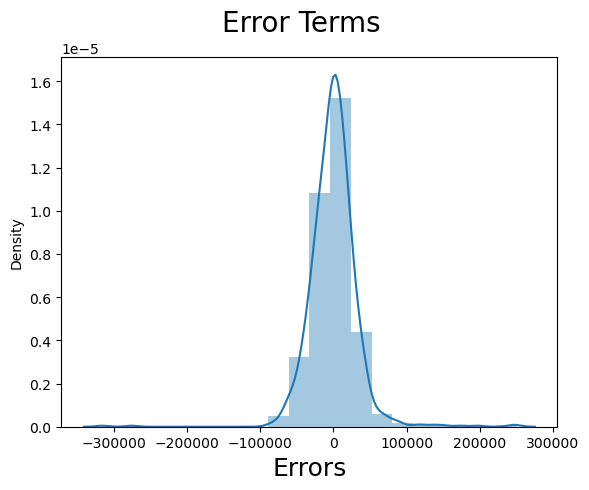

In [168]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


# Evaluate R2 of Train model

In [169]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)


#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)


1129520883527.2217
1106288818.3420389
33260.92028705819


In [171]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res


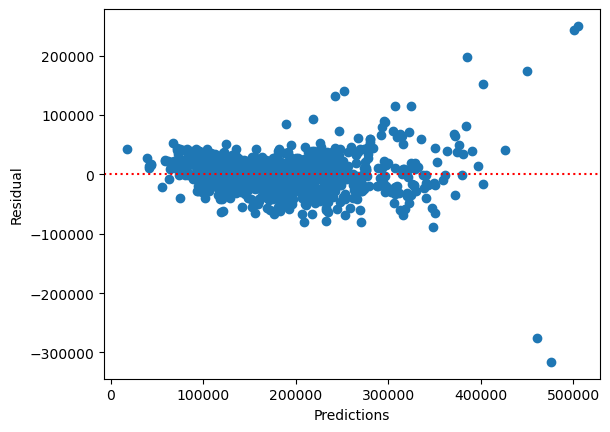

In [172]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()


# Prediction and Evalution on Test Data

In [173]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [174]:
df_test.head()


df_test.describe()


#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test


In [175]:
#trained model columns
X_train_new.columns


Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'RoofStyle_Gambrel', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_RFn'], dtype='object')

In [177]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [178]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()


In [179]:
#check summary()
test_lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     84.47
Date:                Wed, 03 Jan 2024   Prob (F-statistic):          1.97e-151
Time:                        16:09:52   Log-Likelihood:                -5160.6
No. Observations:                 439   AIC:                         1.038e+04
Df Residuals:                     410   BIC:                         1.050e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.766e+05   7388.236     23.900      0.000    1.62e+05    1.91e+05
OverallQual           2.051e+04   2941.703      6.971      0.000    1.47e+04    2.63e+04
BsmtExposure          7935.0120   1901.145      4.174      0.000    4197.804    1.17e+04
1stFlrSF              2.854e+04   2434.517     11.725      0.000    2.38e+04    3.33e+04
2ndFlrSF              1.976e+04   2089.939      9.454      0.000    1.56e+04    2.39e+04
KitchenQual           9647.3696   2194.686      4.396      0.000    5333.128     1.4e+04
GarageCars            9534.8318   2400.626      3.972      0.000    4815.761    1.43e+04
MSSubClass_45         5190.6885   1.62e+04      0.321      0.748   -2.66e+04    3.69e+04
MSSubClass_180        1932.4135   1.91e+04      0.101      0.920   -3.57e+04    3.96e+04
MSSubClass_190        4397.5011   1.49e+04      0.296      0.767   -2.48e+04    3.36e+04
MSZoning_RM          -1.481e+04   5038.989     -2.940      0.003   -2.47e+04   -4909.406
LotShape_IR3         -1.316e+04   3.29e+04     -0.400      0.689   -7.78e+04    5.15e+04
LotConfig_FR3        -6.404e+04    3.3e+04     -1.939      0.053   -1.29e+05     892.314
Neighborhood_ClearCr  1755.6259   1.22e+04      0.144      0.885   -2.22e+04    2.57e+04
Neighborhood_Edwards  -720.7942   7497.213     -0.096      0.923   -1.55e+04     1.4e+04
Neighborhood_NPkVill -2750.8711   1.88e+04     -0.147      0.883   -3.96e+04    3.41e+04
Neighborhood_NoRidge  4.535e+04   1.38e+04      3.285      0.001    1.82e+04    7.25e+04
Neighborhood_NridgHt  6.823e+04   8968.447      7.608      0.000    5.06e+04    8.59e+04
Neighborhood_Somerst  4432.3612   7133.800      0.621      0.535   -9591.026    1.85e+04
Neighborhood_StoneBr  7.171e+04   1.02e+04      7.003      0.000    5.16e+04    9.18e+04
HouseStyle_1.5Unf     5190.6885   1.62e+04      0.321      0.748   -2.66e+04    3.69e+04
RoofStyle_Gambrel    -1.315e+04   1.18e+04     -1.112      0.267   -3.64e+04    1.01e+04
Exterior1st_BrkFace   1.401e+04   7612.118      1.841      0.066    -951.605     2.9e+04
Exterior1st_ImStucc   6.054e-12   7.99e-12      0.757      0.449   -9.66e-12    2.18e-11
Exterior1st_Stone     1.007e-11   1.03e-11      0.974      0.331   -1.03e-11    3.04e-11
Exterior1st_Stucco    1.201e+04   1.49e+04      0.804      0.422   -1.73e+04    4.14e+04
Exterior2nd_CmentBd   7087.6800   7572.086      0.936      0.350   -7797.275     2.2e+04
GarageType_Attchd     1665.6960   7856.592      0.212      0.832   -1.38e+04    1.71e+04
GarageType_Basment   -7552.2644    1.5e+04     -0.504      0.614    -3.7e+04    2.19e+04
GarageType_BuiltIn    2.699e+04    1.1e+04      2.461      0.014    5428.411    4.85e+04
GarageType_Detchd     3669.2043   7682.400      0.478      0.633   -1.14e+04    1.88e+04
GarageFinish_RFn     -2515.2451   3800.457     -0.662    

# calculate r2 score of Test model

In [182]:
# Assuming you've already trained the linear regression model 'lm' and created X_test_new

# Making predictions on the test set
y_pred = lm.predict(X_test_new)

# Evaluating the model
r2 = r2_score(y_true=y_test, y_pred=y_pred)
round(r2, 2)






0.81

In [183]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

526288424242.34393
1198834679.367526
34624.19211140566


In [184]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)


In [185]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
19,HouseStyle_1.5Unf,6.73
6,MSSubClass_45,6.71
0,OverallQual,3.11
2,1stFlrSF,2.09
4,KitchenQual,2.06
26,GarageType_Attchd,2.05
5,GarageCars,1.86
3,2ndFlrSF,1.82
29,GarageType_Detchd,1.77
30,GarageFinish_RFn,1.72


Text(0, 0.5, 'y_pred')

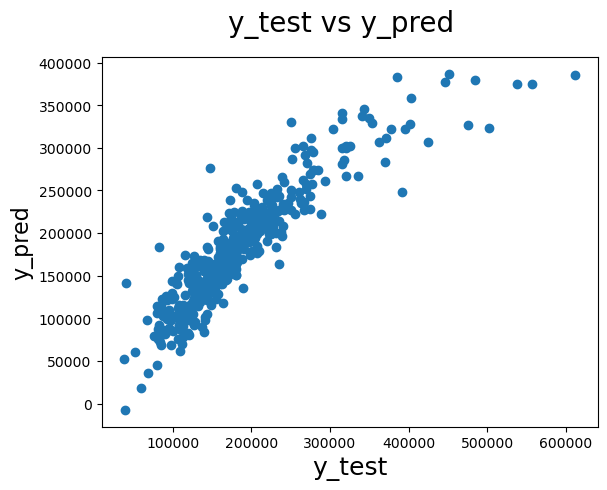

In [186]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


In [187]:
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'RoofStyle_Gambrel', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_RFn'], dtype='object')

In [188]:
#final dataframe 
final_df = house_data[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()


,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,284,1262,1262,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,7,434,920,920,866,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,540,756,961,756,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8,490,1145,1145,1053,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


# Final evalution

In [189]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)


0.8230106109473547
0.8137510203109362
1129520883527.2217
526288424242.34393
1106288818.3420389
1198834679.367526


# Ridge Regression

In [190]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 


# Printing the best hyperparameter alpha
print(model_cv.best_params_)


#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)


# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 20}
[ 2.21730005e+04  1.06478294e+04  2.31905231e+04  1.89764716e+04
  1.08763134e+04  8.32387008e+03 -2.62746272e+03 -2.02806859e+03
 -8.20925841e+03 -1.58768186e+04 -9.06792701e+03 -3.70739249e+03
  6.36491833e+03 -1.17707711e+04 -4.20639358e+03  4.47377843e+04
  3.37533985e+04  1.16751121e+04  9.86590071e+03 -1.25677888e+01
  4.78198755e+03  1.15881987e+04 -1.50911557e+03 -2.76818460e+03
 -1.17303797e+04  7.01319732e+03  3.44898691e+03 -8.43311566e+03
  6.59683147e+02 -6.03207797e+03 -7.34694354e+03]
0.8199241483534416
0.8122265056799296
1149218244904.143
530596283561.7688
1125581043.0011196
1208647570.7557375


# Lasso

In [192]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 


# Printing the best hyperparameter alpha
print(model_cv.best_params_)


#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 


lasso.coef_



Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 500}


array([ 21491.00828516,  10810.03600334,  23035.5357016 ,  18898.7243154 ,
        10578.07161847,   7752.01264753,     -0.        ,     -0.        ,
        -7273.2879556 , -16421.42437445,  -5739.00384918,     -0.        ,
         5296.21002591, -12259.18130406,     -0.        ,  57854.65970704,
        41335.0057671 ,  14171.24964565,  12838.24911858,     -0.        ,
            0.        ,  12644.92956072,     -0.        ,     -0.        ,
       -11484.22287782,   6517.67577515,   3842.40396848,  -6135.38230886,
            0.        ,  -5064.10604482,  -7405.5065578 ])

In [193]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)



0.8212133839899793
0.8127946814784628
1140990528072.917
528990774923.8053
1117522554.4298892
1204990375.68065


In [194]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric



,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.230106e-01,8.199241e-01,8.212134e-01
1,R2 Score (Test),8.137510e-01,8.122265e-01,8.127947e-01
2,RSS (Train),1.129521e+12,1.149218e+12,1.140991e+12
3,RSS (Test),5.262884e+11,5.305963e+11,5.289908e+11
4,MSE (Train),3.326092e+04,3.354968e+04,3.342937e+04
5,MSE (Test),3.462419e+04,3.476561e+04,3.471297e+04


# Lets observe the changes in the coefficients after regularization

In [195]:
betas = pd.DataFrame(index=X.columns)

In [196]:
betas.rows = X.columns

In [197]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [198]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,20759.867534,22173.000513,21491.008285
BsmtExposure,11051.311097,10647.829430,10810.036003
1stFlrSF,23106.396852,23190.523120,23035.535702
2ndFlrSF,18969.117447,18976.471570,18898.724315
KitchenQual,10130.067994,10876.313426,10578.071618
GarageCars,7876.402488,8323.870083,7752.012648
MSSubClass_45,-19929.111950,-2627.462719,-0.000000
MSSubClass_180,-8257.897374,-2028.068587,-0.000000
MSSubClass_190,-13008.785332,-8209.258414,-7273.287956
MSZoning_RM,-16229.595112,-15876.818621,-16421.424374


# Que1: Double the values of Alpha for lasso & Ridge

In [199]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 22811.27013642  10431.5136497   23132.29611722  18818.18578434
  11314.33219261   8762.76097858  -1768.72112485  -1040.12249783
  -6171.97152002 -14908.5381672   -6343.03903576  -1909.68662441
   4734.53910792 -10370.66590517  -2790.00711399  35222.92022483
  27335.67707437   8859.69340738   6021.75969908   -478.84699493
   2740.3284268    8843.88984804   -495.20401493  -1657.34213387
  -9263.40985207   5543.90031115   3574.05327952  -5847.13087025
   1107.32024086  -6167.95957825  -6678.37438555]
0.8163098656144201
0.8100694552798535


In [200]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 22297.9820258   10639.20161803  22862.28969761  18532.80079523
  10983.61408501   7926.35393214     -0.             -0.
  -2509.40877946 -15928.85599331     -0.             -0.
    458.70994475 -11094.17610667     -0.          53620.28675819
  37321.11468352  10965.19350614   3294.68883612     -0.
      0.           8330.96032915     -0.             -0.
  -7156.14424144   4242.90803656   4036.33524563     -0.
      0.          -4648.54782618  -6597.34837071]
0.818627528902354
0.8081155584312507
